# Author : Shaik Imranuddin

## Prediction using Linear Regression

I have tried to predict the number of Covid-19 cases in India based on the dataset containing previous cases information. 
Here I have made a Linear Regression model to predict the Covid-19 cases.

## Technical Stack  : Sikit Learn, Numpy Array, Pandas, Matplotlib

## Importing the required libraries

In [1]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

## Reading the data 

In [2]:
std=pd.read_csv('state_wise_daily.csv')

In [3]:
std.head()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,2020-03-14,Recovered,9,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,2020-03-14,Deceased,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,2020-03-15,Recovered,4,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0


In [4]:
# Using describe() to see mean,max,min,count,std,percentiles of the given dataset

std.describe()

,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
count,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.0,...,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000
mean,41671.131403,10.460282,2502.314774,40.440980,603.252413,1050.308834,89.268745,1435.974016,15.101707,0.0,...,840.044543,1387.775798,21.610245,3100.342242,853.563474,76.263549,2505.765405,478.025984,2074.104677,0.000000
std,78308.933326,21.395078,4835.213995,80.742073,1211.537768,2513.030627,173.327767,3219.209735,40.263167,0.0,...,1638.785505,3368.976748,52.945810,6364.960630,1511.367737,161.426828,6149.023963,1245.182537,4206.739805,108.884981
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,-3.000000,0.000000,-1.000000,0.000000,0.000000,-2.000000,-1.000000,-374.000000,-19.000000,-1295.000000
25%,553.500000,0.000000,14.000000,0.000000,2.000000,5.000000,1.000000,7.000000,0.000000,0.0,...,15.000000,12.000000,0.000000,41.500000,7.000000,0.000000,27.000000,3.000000,33.500000,0.000000
50%,11796.000000,1.000000,106.000000,1.000000,29.000000,96.000000,10.000000,147.000000,0.000000,0.0,...,179.000000,196.000000,2.000000,567.000000,157.000000,3.000000,247.000000,54.000000,249.000000,0.000000
75%,48201.000000,12.000000,2215.500000,37.000000,476.000000,841.000000,87.500000,1377.500000,11.000000,0.0,...,713.500000,1342.000000,19.000000,3696.500000,1271.000000,64.500000,2071.000000,390.500000,2950.000000,0.000000
max,422391.000000,149.000000,24819.000000,497.000000,6573.000000,15853.000000,963.000000,18746.000000,359.000000,0.0,...,9059.000000,29459.000000,420.000000,36184.000000,17183.000000,1066.000000,40852.000000,9642.000000,20846.000000,1043.000000


In [5]:
std['Confirmed']=std['TT']

In [6]:
std.head()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,RJ,SK,TN,TG,TR,UP,UT,WB,UN,Confirmed
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,...,3,0,1,1,0,12,0,0,0,81
1,14-Mar-20,2020-03-14,Recovered,9,0,0,0,0,0,0,...,1,0,0,0,0,4,0,0,0,9
2,14-Mar-20,2020-03-14,Deceased,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,...,1,0,0,2,0,1,0,0,0,27
4,15-Mar-20,2020-03-15,Recovered,4,0,0,0,0,0,0,...,2,0,0,1,0,0,0,0,0,4


In [7]:
std=std[std.Status=='Confirmed']

In [8]:
std=std.drop(columns='Status', axis=1)

In [9]:
std.head()

,Date,Date_YMD,TT,AN,AP,AR,AS,BR,CH,CT,...,RJ,SK,TN,TG,TR,UP,UT,WB,UN,Confirmed
0,14-Mar-20,2020-03-14,81,0,1,0,0,0,0,0,...,3,0,1,1,0,12,0,0,0,81
3,15-Mar-20,2020-03-15,27,0,0,0,0,0,0,0,...,1,0,0,2,0,1,0,0,0,27
6,16-Mar-20,2020-03-16,15,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,15
9,17-Mar-20,2020-03-17,11,0,0,0,0,0,0,0,...,0,0,0,1,0,2,0,1,0,11
12,18-Mar-20,2020-03-18,37,0,0,0,0,0,0,0,...,3,0,1,8,0,2,1,0,0,37


In [10]:
columns=['Date','Date_YMD', 'Confirmed']

In [11]:
std=std[columns]

In [12]:
std.head()

,Date,Date_YMD,Confirmed
0,14-Mar-20,2020-03-14,81
3,15-Mar-20,2020-03-15,27
6,16-Mar-20,2020-03-16,15
9,17-Mar-20,2020-03-17,11
12,18-Mar-20,2020-03-18,37


In [13]:
std.groupby('Date_YMD').mean()

,Confirmed
Date_YMD,
2020-03-14,81
2020-03-15,27
2020-03-16,15
2020-03-17,11
2020-03-18,37
...,...
2021-06-01,133152
2021-06-02,134044
2021-06-03,132424


In [14]:
std['Date']=pd.to_datetime(std['Date'])
std['Date']=std['Date'].map(dt.datetime.toordinal)

In [15]:
std.tail()

,Date,Date_YMD,Confirmed
1332,737942,2021-06-01,133152
1335,737943,2021-06-02,134044
1338,737944,2021-06-03,132424
1341,737945,2021-06-04,120454
1344,737946,2021-06-05,114486


## Visualization of Input Data

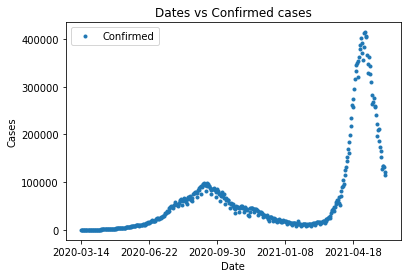

In [16]:
# Plotting the distribution of confirmed cases

std.plot(x='Date_YMD', y='Confirmed', style='.')  
plt.title('Dates vs Confirmed cases')  
plt.xlabel('Date')  
plt.ylabel('Cases')  
plt.show()

## Data Preprocessing
This step involved division of data into "attributes" (inputs) and "labels" (outputs).

In [17]:
X = std.iloc[:, :-2].values   # Date
Y = std.iloc[:, 2].values     # Confirmed cases

## Training the model
Splitting the data into training and testing sets and

Training the algorithm.

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

regsr = LinearRegression()  
regsr.fit(X_train.reshape(-1,1), Y_train) 

print("Training completed.")

Training completed.


## Plotting the Regression Line

Now since our model is trained, let visualize the best-fit line of regression.

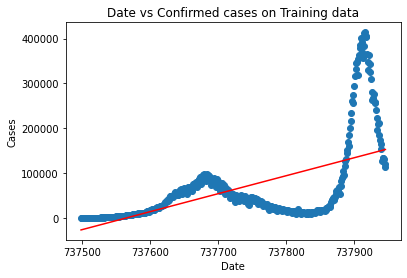

In [19]:
# Plotting the regression line
regline = regsr.coef_*X+regsr.intercept_

# Plotting on the training dataset
plt.scatter(X, Y)
plt.plot(X, regline, color='red');
plt.title('Date vs Confirmed cases on Training data')  
plt.xlabel('Date')  
plt.ylabel('Cases')  
plt.show()

## Making Predictions
Now that we have trained our algorithm, it is time to make some predictions to test the model.

We will use our testing dataset for this predictions

In [20]:
# Test dataset

print(X_test)

[[737622]
 [737552]
 [737872]
 [737840]
 [737728]
 [737632]
 [737510]
 [737830]
 [737769]
 [737574]
 [737876]
 [737655]
 [737818]
 [737662]
 [737846]
 [737519]
 [737616]
 [737499]
 [737508]
 [737750]
 [737862]
 [737677]
 [737916]
 [737611]
 [737806]
 [737885]
 [737842]
 [737718]
 [737722]
 [737711]
 [737940]
 [737873]
 [737791]
 [737535]
 [737729]
 [737734]
 [737891]
 [737708]
 [737864]
 [737801]
 [737658]
 [737717]
 [737884]
 [737703]
 [737903]
 [737883]
 [737598]
 [737640]
 [737847]
 [737569]
 [737692]
 [737829]
 [737669]
 [737504]
 [737605]
 [737576]
 [737861]
 [737513]
 [737558]
 [737898]
 [737642]
 [737879]
 [737759]
 [737554]
 [737686]
 [737600]
 [737594]
 [737886]
 [737946]
 [737909]
 [737588]
 [737908]
 [737910]
 [737633]
 [737557]
 [737850]
 [737668]
 [737932]
 [737563]
 [737639]
 [737912]
 [737935]
 [737652]
 [737943]
 [737799]
 [737673]
 [737656]
 [737694]
 [737739]
 [737745]]


In [21]:
# Model Prediction 

Y_pred = regsr.predict(X_test)
print(Y_pred)

[ 22960.17351049  -5069.90584552 123067.59978193 110253.84921914
  65405.72224957  26964.47056133 -21887.95345908 106249.55216831
  81823.3401581    3739.54766637 124669.31860226  36174.3537783
 101444.39570731  38977.36171389 112656.4274497  -18284.08611333
  20557.59527999 -26292.68021506 -22688.81286931  74215.17576146
 119063.30273104  44983.8072902  140686.50680566  18555.44675452
  96639.23924625 128273.18594801 111054.70862931  61401.42519873
  63003.14401907  58598.41726309 150296.81972772 123468.02948701
  90632.79366994 -11877.21083194  65806.15195465  67808.30048007
 130675.76417851  57397.12814784 119864.1621412   94637.09072083
  37375.64289355  61000.99549365 127872.75624293  55394.97962242
 135480.92063957 127472.32653785  13349.86058843  30167.90820205
 113056.85715479   1737.39914095  50990.25286651 105849.12246323
  41780.36964953 -24290.53168964  16152.86852401   4540.40707654
 118662.87302595 -20686.66434383  -2667.32761502 133478.77211416
  30968.76761222 125870.60

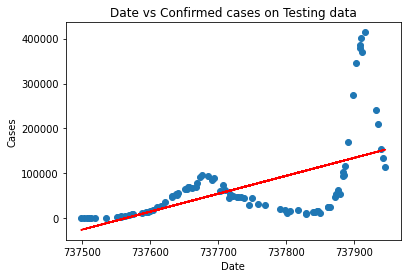

In [22]:
# Plotting on the testing dataset

plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color='red');
plt.title('Date vs Confirmed cases on Testing data')  
plt.xlabel('Date')  
plt.ylabel('Cases')   
plt.show()

## Comparing Actual result to the Predicted Model result

In [23]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred}) 
df

,Actual,Predicted
0,35468,22960.173510
1,3344,-5069.905846
2,47239,123067.599782
3,13916,110253.849219
4,48117,65405.722250
...,...,...
85,90600,43382.088470
86,69196,36574.783483
87,88759,51791.112277
88,44724,69810.449005


In [24]:
#Estimating training and testing score

print("Training Score:",regsr.score(X_train,Y_train))
print("Testing Score:",regsr.score(X_test,Y_test))

Training Score: 0.33862433396438363
Testing Score: 0.32381268356516313


In [26]:
date = "2021-06-05"
dte=dt.datetime.strptime(date, '%Y-%M-%d').toordinal()
prediction_cases = regsr.predict([[dte]])
print("Predicted cases on {}  is : {}".format(date,prediction_cases[0]))

Predicted cases on 2021-06-05  is : 92234.51249033213


## Evaluating the model
The final step is to evaluate the performance of our algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy.

In [27]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-2:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 52056.758690417475
Mean Squared Error: 6408974847.217918
Root Mean Squared Error: 80056.07314387783
R-2: 0.32381268356516313


#### Root Mean Squared Error in this case is VERY HIGH
#### R-2 gives the score of Model Fit and in this case 32.38% score of testing data indicates that above fitted Model is NOT A GOOD MODEL.

# Conclusion

### From the above Prediction Model,  we can say that the Linear Regression is NOT a good model for predicting Covid-19 Cases.

# Thank You